<a href="https://colab.research.google.com/github/SowmyaDontha88/Retail_Price_Optimization/blob/main/Retail_Price_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings("ignore")

# **EDA**

In [4]:
df = pd.read_csv('/content/retail_price.csv')
df.head(3)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.0,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.0,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.0,4.4,22.195932,45.95,4.0,14.840000,45.95


In [5]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [6]:
df.shape

(676, 30)

In [7]:
df.dtypes

product_id                     object
product_category_name          object
month_year                     object
qty                             int64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g                int64
product_score                 float64
customers                       int64
weekday                         int64
weekend                         int64
holiday                         int64
month                           int64
year                            int64
s                             float64
volume                          int64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3      

In [10]:
df.nunique()

product_id                     52
product_category_name           9
month_year                     20
qty                            66
total_price                   573
freight_price                 653
unit_price                    280
product_name_lenght            24
product_description_lenght     46
product_photos_qty              7
product_weight_g               45
product_score                  11
customers                      94
weekday                         4
weekend                         3
holiday                         5
month                          12
year                            2
s                             450
volume                         40
comp_1                         88
ps1                             9
fp1                           179
comp_2                        123
ps2                            10
fp2                           242
comp_3                        105
ps3                             9
fp3                           229
lag_price     

In [11]:
#Statistical Analysis
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [12]:
df.drop("product_id",axis=1,inplace=True)

In [13]:
 #Top 15 highest prices
df.sort_values("total_price",ascending=False).head(15)

,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
673,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,9750,...,89.900000,3.9,13.993833,205.000000,4.4,22.195932,45.950000,4.0,14.840000,209.000000
277,watches_gifts,01-05-2018,114,11820.20,0.095439,103.792523,33,523,3,584,...,103.792523,4.2,0.095439,105.000000,4.2,11.377297,132.531250,3.8,15.762187,105.648625
674,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,9750,...,89.900000,3.9,14.656757,199.509804,4.4,19.412885,45.950000,4.0,14.287500,205.000000
175,computers_accessories,01-02-2018,69,10343.10,26.552899,149.900000,48,894,1,533,...,149.000000,4.2,41.163226,149.900000,4.3,26.552899,78.712281,3.5,14.535915,150.354546
549,health_beauty,01-08-2018,28,9240.00,20.505357,330.000000,60,2644,6,400,...,23.990000,4.3,16.770000,82.821429,4.1,12.418571,58.990000,3.9,12.083333,330.000000
544,health_beauty,01-03-2018,28,9125.00,19.370357,325.892857,60,2644,6,400,...,23.990000,4.3,14.198750,83.740000,4.1,11.876875,58.990000,3.9,15.228000,325.000000
276,watches_gifts,01-04-2018,85,8961.49,2.181647,105.648625,33,523,3,584,...,105.648625,4.2,2.181647,105.000000,4.2,13.631429,150.133333,3.8,19.447778,117.441290
499,furniture_decor,01-01-2018,122,8538.00,17.663115,69.995327,44,903,6,2600,...,69.995327,4.1,17.663115,38.400000,3.7,9.340000,99.900000,4.4,22.819231,75.000000
178,computers_accessories,01-05-2018,52,7794.80,18.943077,149.900000,48,894,1,533,...,119.000000,4.2,39.217200,149.900000,4.3,18.943077,79.800000,3.5,14.414545,149.900000
612,watches_gifts,01-07-2018,45,7651.27,17.953556,169.349318,46,501,4,363,...,118.363636,4.2,15.480000,105.000000,4.2,24.938750,155.000000,3.8,16.470000,245.900000


In [14]:
#Lowest price
df.sort_values("total_price",ascending=True).head(15)

,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
329,consoles_games,01-07-2017,1,19.90,11.85,19.90,56,237,3,100,...,19.900000,4.2,13.473077,19.900000,3.9,11.850000,19.900000,3.9,11.850000,19.850000
281,cool_stuff,01-09-2017,1,29.50,11.73,29.50,57,787,8,1867,...,99.990000,4.2,15.933333,29.500000,4.4,11.730000,29.500000,4.4,11.730000,29.450000
623,health_beauty,01-10-2017,1,29.90,11.85,29.90,55,388,1,250,...,23.990000,4.3,13.136667,89.990000,4.1,16.562917,58.990000,3.9,19.065263,29.850000
336,consoles_games,01-02-2018,1,32.50,11.85,32.50,56,237,3,100,...,32.500000,4.2,15.256000,32.500000,3.9,11.850000,32.500000,3.9,11.850000,27.033333
468,furniture_decor,01-08-2018,1,35.00,19.44,35.00,41,789,1,950,...,103.233333,4.1,22.300000,35.000000,3.7,15.628125,83.833333,4.4,23.776667,34.950000
41,consoles_games,01-07-2018,1,36.20,22.18,36.20,49,100,4,150,...,36.200000,4.2,22.180000,36.200000,4.2,22.180000,36.200000,4.2,22.180000,36.200000
524,furniture_decor,01-07-2017,1,38.40,7.78,38.40,49,829,1,850,...,75.000000,4.1,15.856000,38.400000,3.7,7.780000,38.400000,3.7,7.780000,38.350000
457,furniture_decor,01-08-2017,1,38.40,11.85,38.40,41,789,1,950,...,75.000000,4.1,15.376923,38.400000,3.7,12.105000,38.400000,3.8,11.850000,38.350000
0,bed_bath_table,01-05-2017,1,45.95,15.10,45.95,39,161,2,350,...,89.900000,3.9,15.011897,215.000000,4.4,8.760000,45.950000,4.0,15.100000,45.900000
75,health_beauty,01-08-2018,2,47.98,16.77,23.99,48,575,1,100,...,23.990000,4.3,16.770000,82.821429,4.1,12.418571,58.990000,3.9,12.083333,23.990000


In [16]:
df.isnull().sum()

product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

There are no null values in the dataset

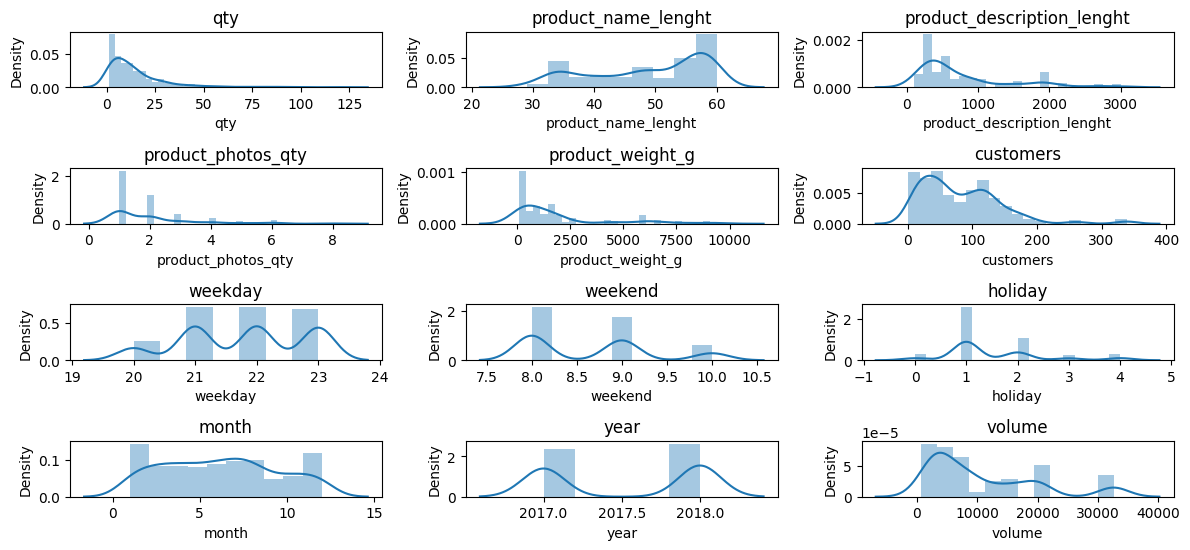

In [17]:
k=1
plt.figure(figsize=(12,12))

for i in df.select_dtypes("int"):
    plt.subplot(9,3,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1
    plt.tight_layout()

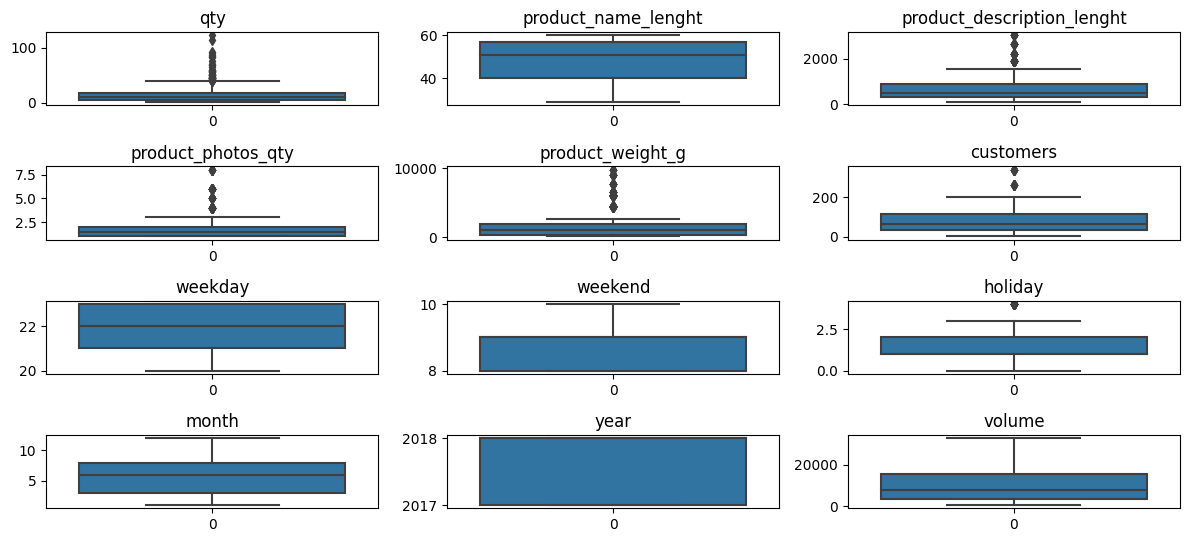

In [19]:
#Detecting the outlier using Boxplot

k=1
plt.figure(figsize=(12,12))

for i in df.select_dtypes("int"):
    plt.subplot(9,3,k)
    sns.boxplot(df[i])
    plt.title(i)
    k+=1
    plt.tight_layout()

In [20]:
df_outlier_remove=df.copy()

In [21]:
outlier_list=["qty","customers","comp_1","comp_3"]


for i in df_outlier_remove.loc[:,outlier_list]:
    Q1 = df_outlier_remove[i].quantile(0.10)
    Q3 = df_outlier_remove[i].quantile(0.90)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df_outlier_remove[(df_outlier_remove[i] > up) | (df_outlier_remove[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

qty yes
customers no
comp_1 yes
comp_3 no


The columns qty and comp_1 have outliers and need to be replaced with threshold value.

In [22]:
def outliers_train(df_outlier_remove):
    q1,q3=np.percentile(df_outlier_remove,[10,90])
    ıqr=q3-q1
    low,high=q1-1.5*(ıqr),q3+1.5*(ıqr)
    outliers_train=[i for i in df_outlier_remove if i<low or i>high]
    return outliers_train

In [23]:
outliers_train(df.qty)

[87, 91, 82, 85, 114, 76, 122, 83, 92]

In [24]:
# Remove outliers

for i in df_outlier_remove.loc[:,outlier_list]:

    Q1 = df_outlier_remove[i].quantile(0.10)
    Q3 = df_outlier_remove[i].quantile(0.90)
    IQR = Q3 - Q1
    up_lim=Q3+1.5 *IQR
    low_lim=Q1-1.5 *IQR

    df_outlier_remove.loc[df_outlier_remove[i]>up_lim,i]=up_lim
    df_outlier_remove.loc[df_outlier_remove[i]<low_lim,i]=low_lim

In [25]:
for i in df_outlier_remove.loc[:,outlier_list]:
    Q1 = df_outlier_remove[i].quantile(0.10)
    Q3 = df_outlier_remove[i].quantile(0.90)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df_outlier_remove[(df_outlier_remove[i] > up) | (df_outlier_remove[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

qty no
customers no
comp_1 no
comp_3 no


The outliers are replaced.

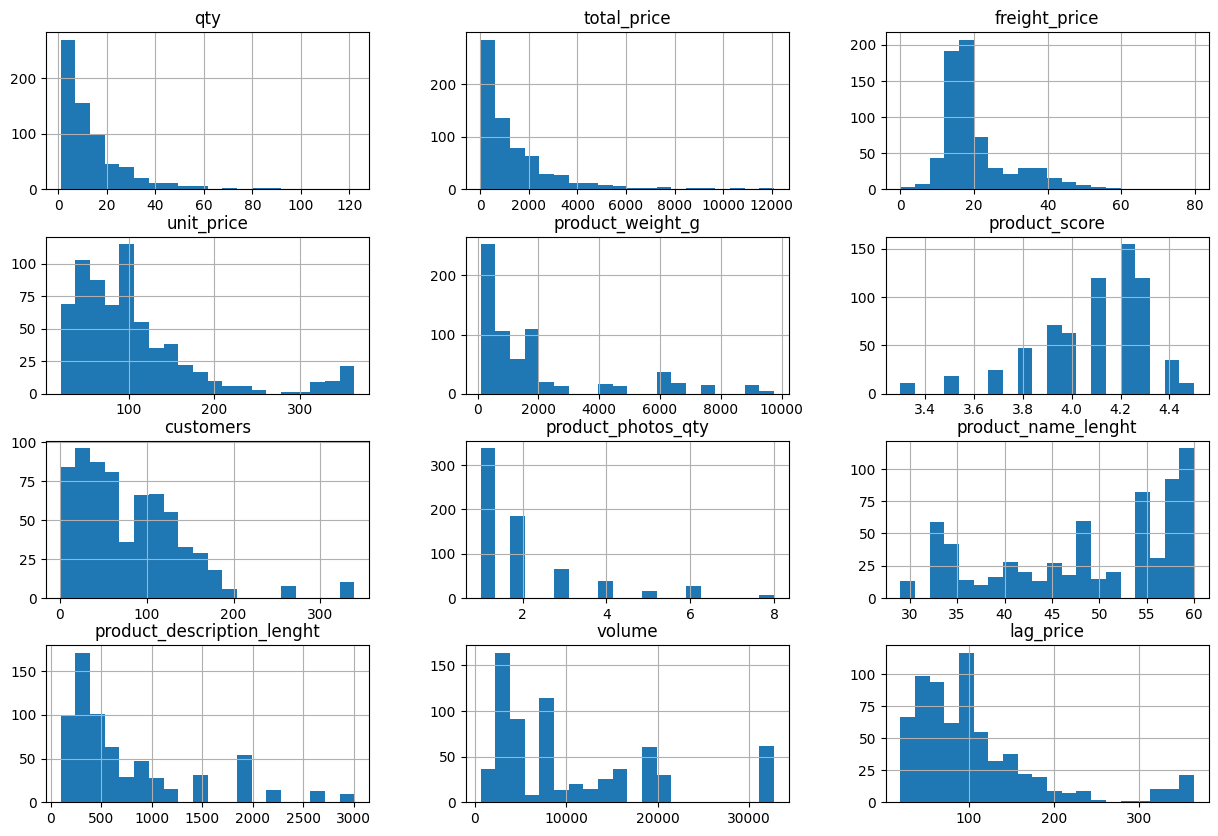

In [26]:
# Histograms

numerical_cols = ['qty', 'total_price', 'freight_price', 'unit_price', 'product_weight_g', 'product_score', 'customers', 'product_photos_qty', 'product_name_lenght', 'product_description_lenght', 'volume', 'lag_price']
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.show()

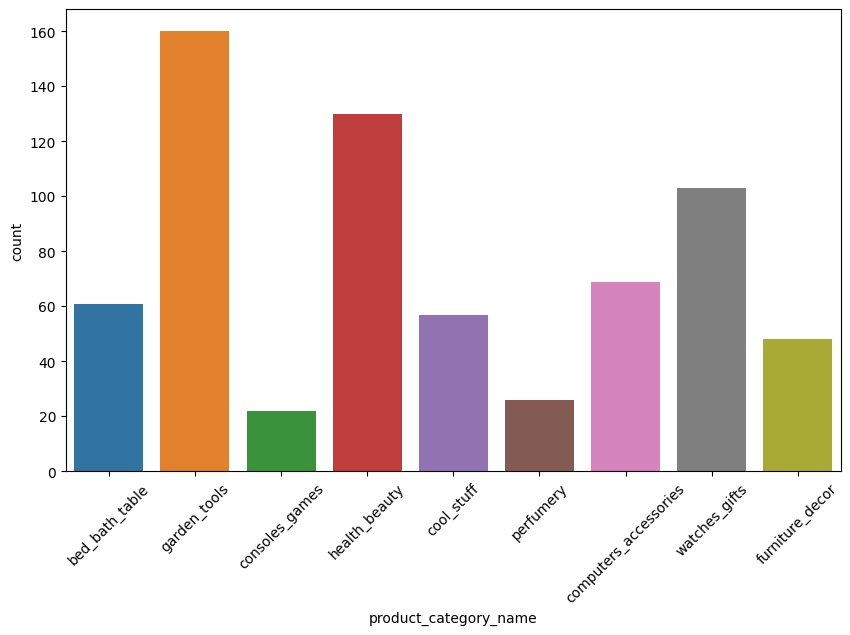

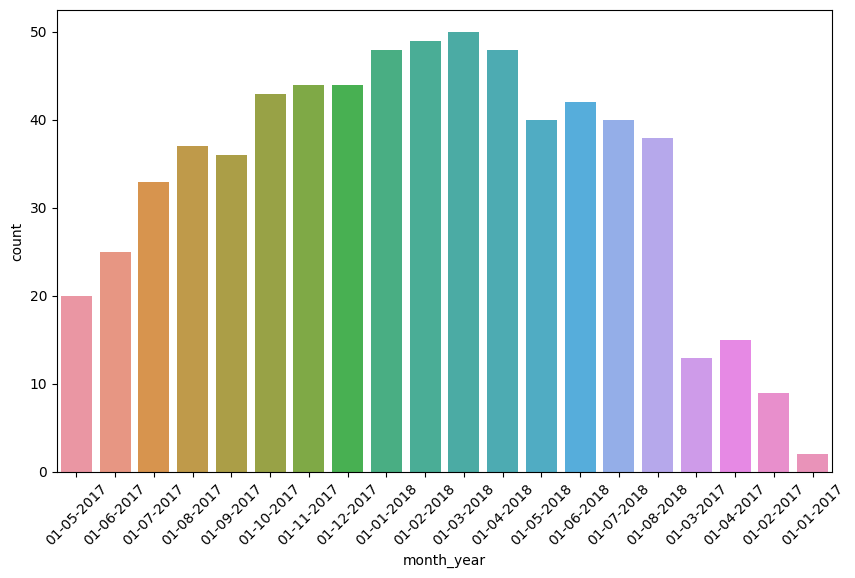

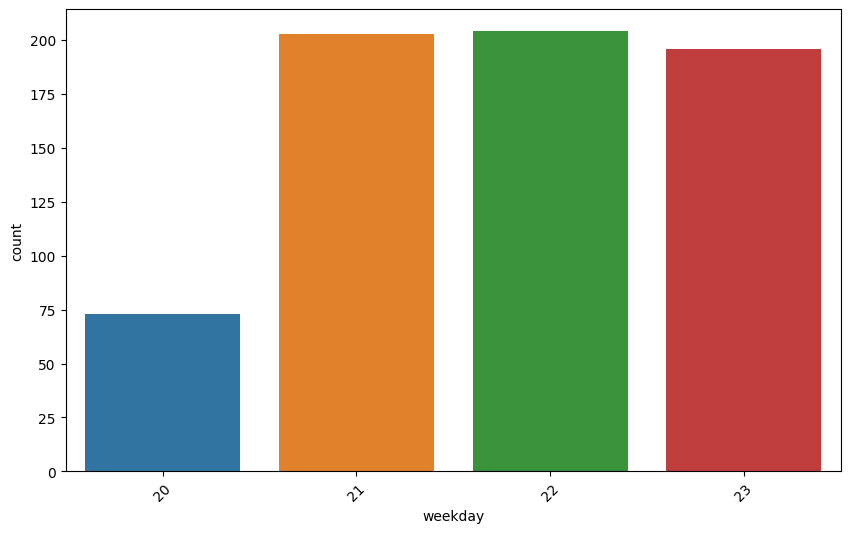

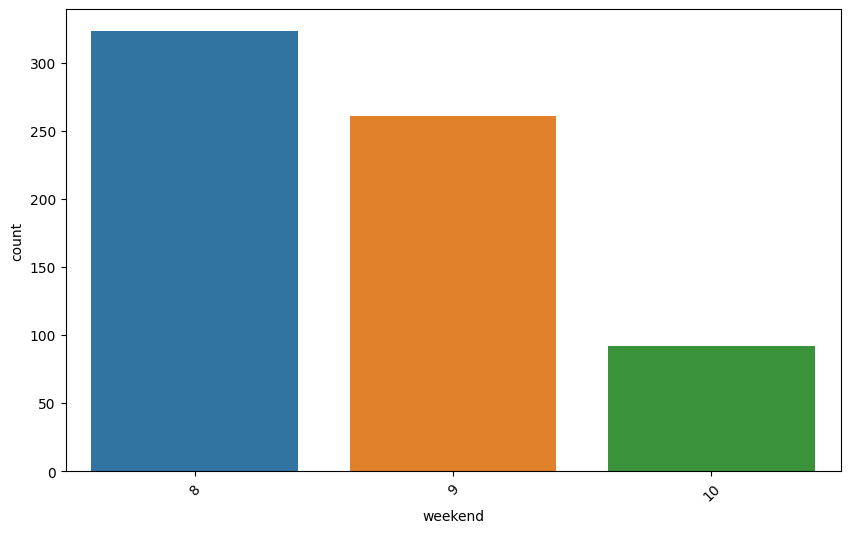

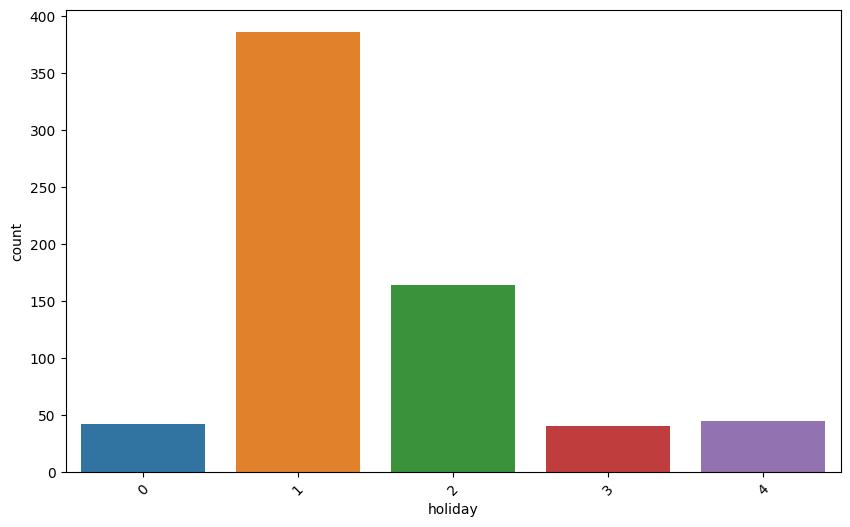

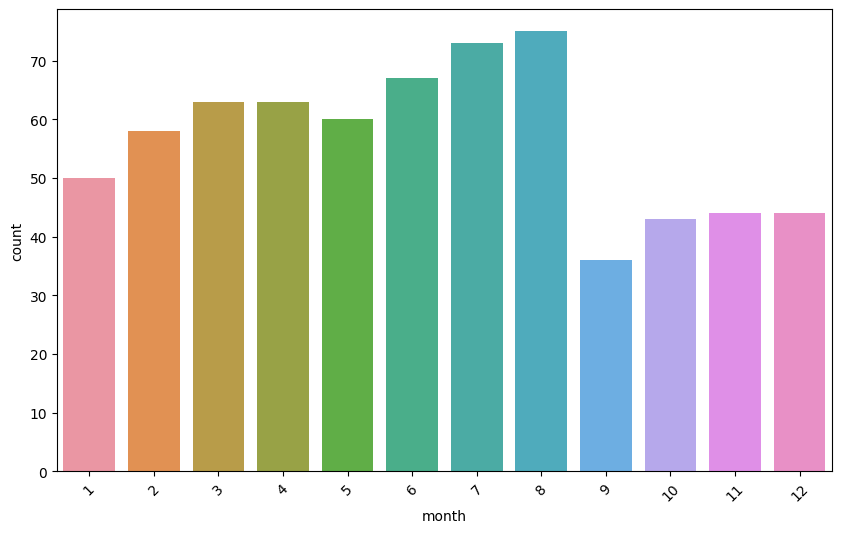

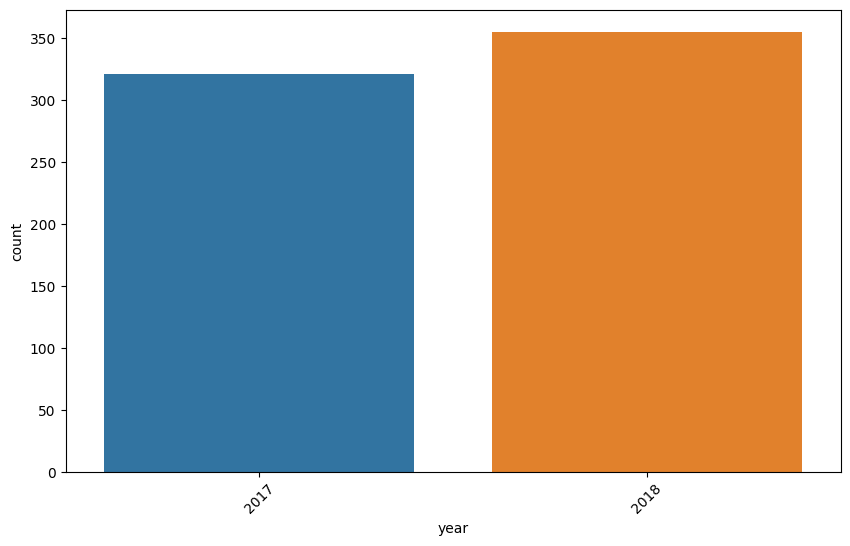

In [27]:
# Bar Plots

categorical_cols = ['product_category_name', 'month_year', 'weekday', 'weekend', 'holiday', 'month', 'year']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.show()

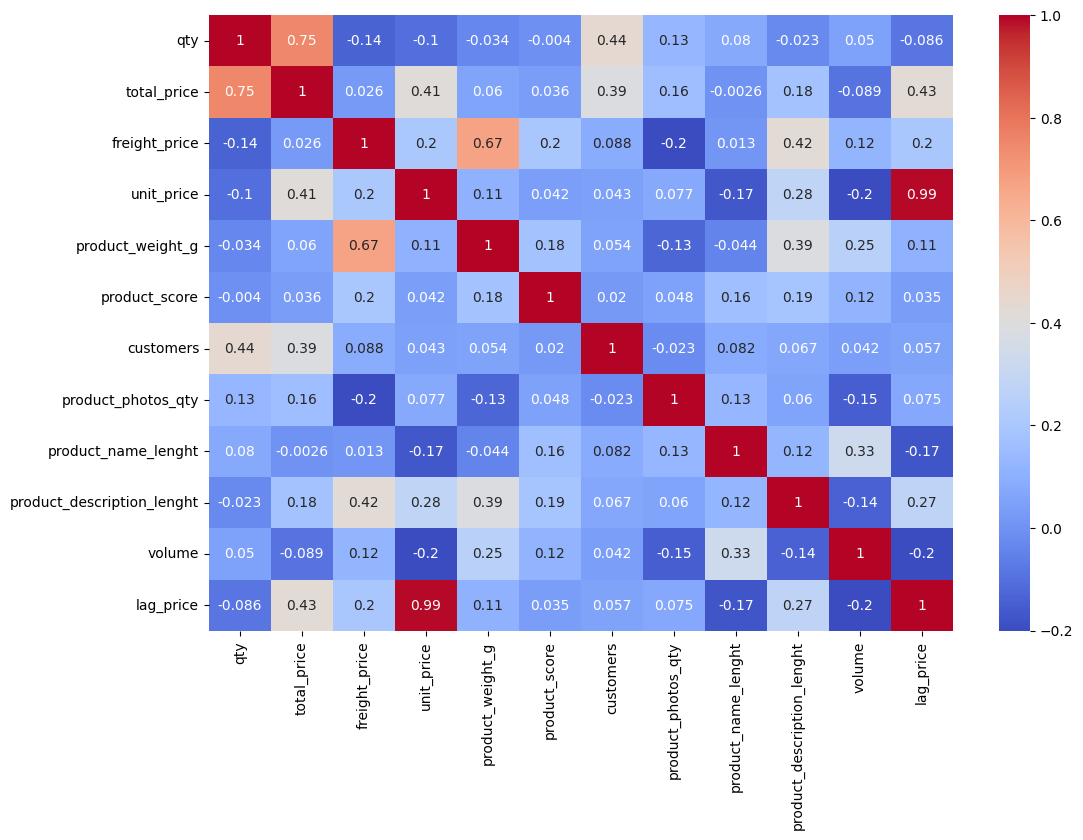

In [28]:
# Correlation Matrix Heatmap

corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

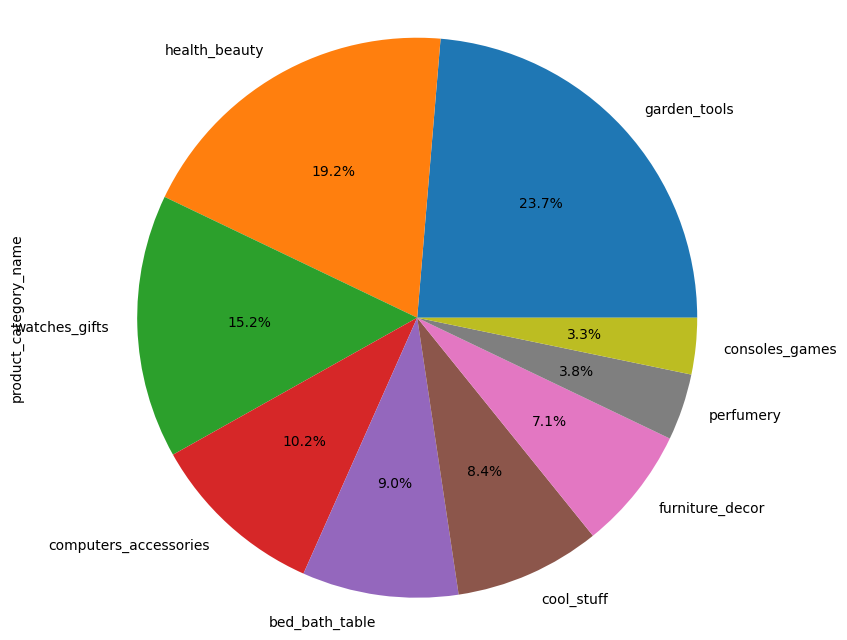

In [29]:
# Pie Chart
plt.figure(figsize=(10, 8))
df['product_category_name'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Most of the revenue for the retail company is contributed by selling graden tools, health products, watch gift and computer accessories.

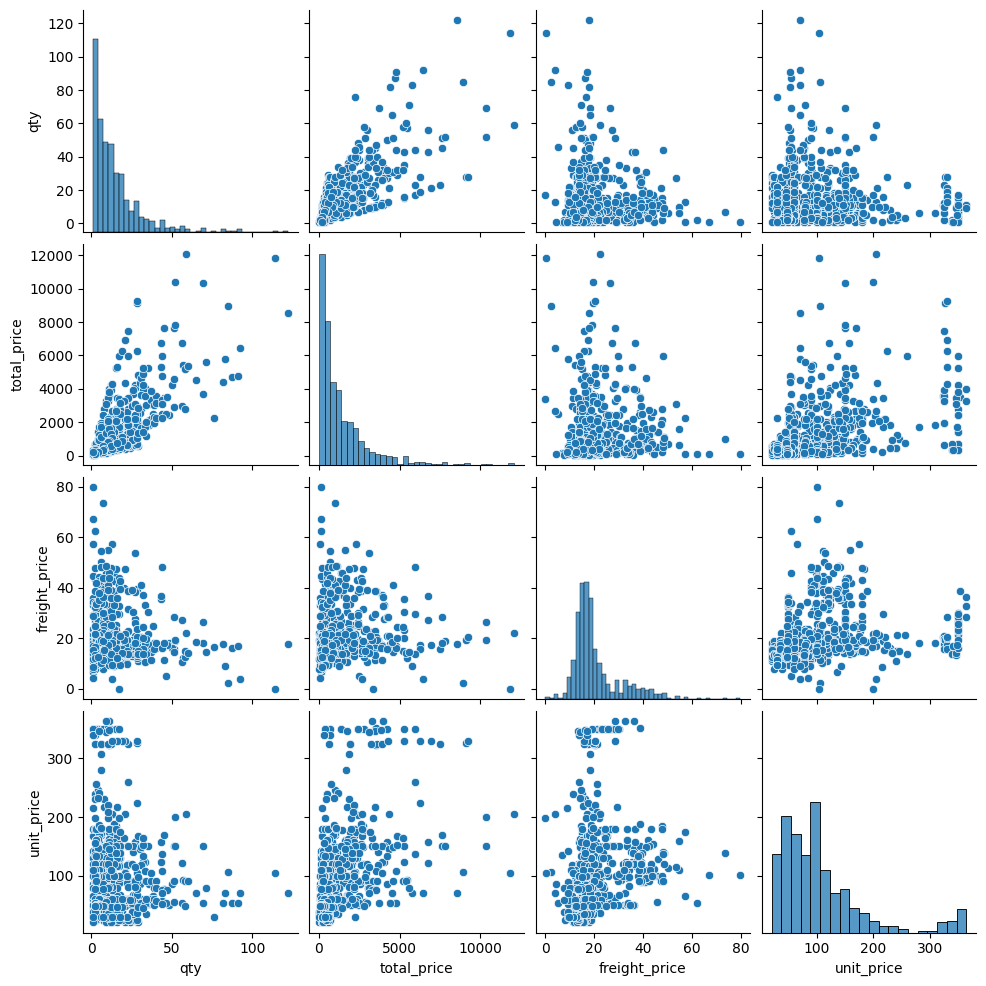

In [30]:
# Pair Plot

pair_plot_cols = numerical_cols[:4]  # Select a subset of numerical columns for better visualization
sns.pairplot(data=df[pair_plot_cols])
plt.show()

# **Time series Analysis**

In [31]:
from datetime import datetime

df["month_year"] = pd.to_datetime(df.month_year)
df["day"]=df["month_year"].dt.day
df.head()

,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,day
0,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,350,...,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90,5
1,bed_bath_table,2017-01-06,3,137.85,12.933333,45.95,39,161,2,350,...,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95,6
2,bed_bath_table,2017-01-07,6,275.70,14.840000,45.95,39,161,2,350,...,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95,7
3,bed_bath_table,2017-01-08,4,183.80,14.287500,45.95,39,161,2,350,...,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95,8
4,bed_bath_table,2017-01-09,2,91.90,15.100000,45.95,39,161,2,350,...,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95,9


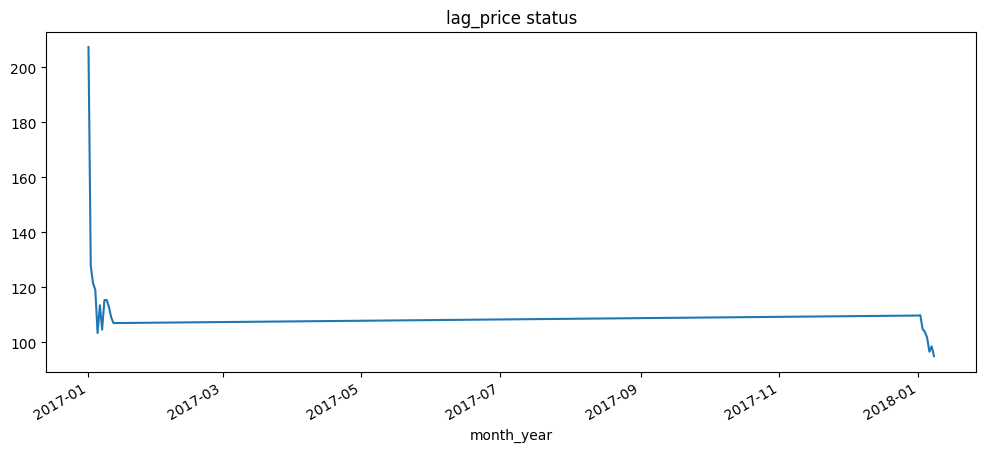

In [32]:
custgroup=df.groupby('month_year').mean()
plt.figure(figsize=(12,5))
custgroup['lag_price'].plot(x=df.month_year)
plt.title("lag_price status")
plt.show()

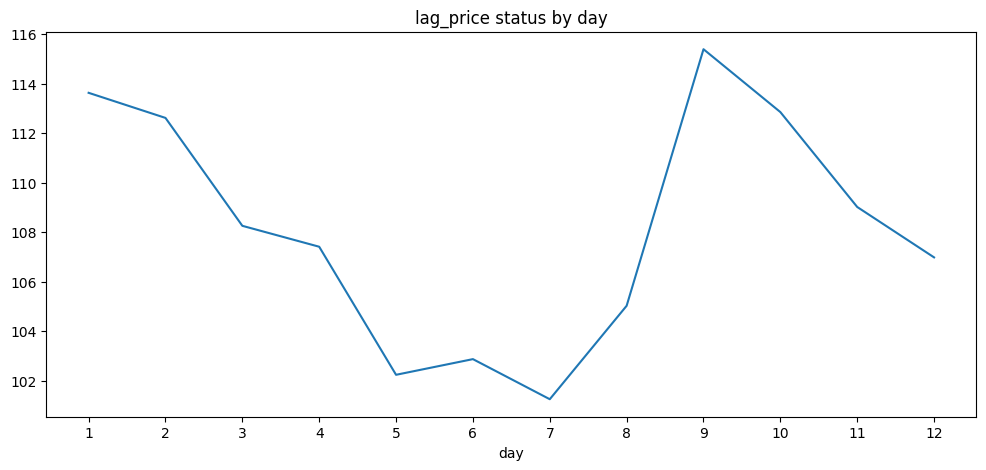

In [33]:
custgroup=df.groupby('day').mean()
fig,ax=plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,31))
custgroup['lag_price'].plot(x=df.month_year)
plt.title("lag_price status by day")
plt.show()

In [34]:
df.drop("month_year",axis=1,inplace=True)
df.head(2)

,product_category_name,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,...,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,day
0,bed_bath_table,1,45.95,15.100000,45.95,39,161,2,350,4.0,...,3.9,15.011897,215.0,4.4,8.760,45.95,4.0,15.100000,45.90,5
1,bed_bath_table,3,137.85,12.933333,45.95,39,161,2,350,4.0,...,3.9,14.769216,209.0,4.4,21.322,45.95,4.0,12.933333,45.95,6


In [35]:
df_outlier_remove["month_year"] = pd.to_datetime(df_outlier_remove.month_year)
df_outlier_remove["day"]=df_outlier_remove["month_year"].dt.day
df_outlier_remove.drop("month_year",axis=1,inplace=True)
df_outlier_remove.head(2)

,product_category_name,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,...,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,day
0,bed_bath_table,1.0,45.95,15.100000,45.95,39,161,2,350,4.0,...,3.9,15.011897,215.0,4.4,8.760,45.95,4.0,15.100000,45.90,5
1,bed_bath_table,3.0,137.85,12.933333,45.95,39,161,2,350,4.0,...,3.9,14.769216,209.0,4.4,21.322,45.95,4.0,12.933333,45.95,6


# Encoding

In [36]:
# One Hot Encoding

dms=pd.get_dummies(df["product_category_name"])
dms

,bed_bath_table,computers_accessories,consoles_games,cool_stuff,furniture_decor,garden_tools,health_beauty,perfumery,watches_gifts
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
671,1,0,0,0,0,0,0,0,0
672,1,0,0,0,0,0,0,0,0
673,1,0,0,0,0,0,0,0,0
674,1,0,0,0,0,0,0,0,0


In [37]:
df.drop("product_category_name",axis=1,inplace=True)
df=pd.concat([df,dms],axis=1)
df.head()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,day,bed_bath_table,computers_accessories,consoles_games,cool_stuff,furniture_decor,garden_tools,health_beauty,perfumery,watches_gifts
0,1,45.95,15.100000,45.95,39,161,2,350,4.0,57,...,5,1,0,0,0,0,0,0,0,0
1,3,137.85,12.933333,45.95,39,161,2,350,4.0,61,...,6,1,0,0,0,0,0,0,0,0
2,6,275.70,14.840000,45.95,39,161,2,350,4.0,123,...,7,1,0,0,0,0,0,0,0,0
3,4,183.80,14.287500,45.95,39,161,2,350,4.0,90,...,8,1,0,0,0,0,0,0,0,0
4,2,91.90,15.100000,45.95,39,161,2,350,4.0,54,...,9,1,0,0,0,0,0,0,0,0


In [38]:
# remove outlier

dms2=pd.get_dummies(df_outlier_remove["product_category_name"])
df_outlier_remove.drop("product_category_name",axis=1,inplace=True)
df_outlier_remove=pd.concat([df_outlier_remove,dms2],axis=1)

In [39]:
df_outlier_remove.drop(["unit_price","day"],axis=1,inplace=True)

# **Modelling**

In [40]:
X=df.drop("lag_price",axis=1)
y=df["lag_price"]

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [43]:
#!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.2 MB/s eta 0:00:00


In [44]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [45]:
ridge=Ridge().fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
enet=ElasticNet().fit(X_train,y_train)
knn=KNeighborsRegressor().fit(X_train,y_train)
ada=AdaBoostRegressor().fit(X_train,y_train)
svm=SVR().fit(X_train,y_train)
mlpc=MLPRegressor().fit(X_train,y_train)
dtc=DecisionTreeRegressor().fit(X_train,y_train)
rf=RandomForestRegressor().fit(X_train,y_train)
xgb=XGBRegressor().fit(X_train,y_train)
gbm=GradientBoostingRegressor().fit(X_train,y_train)
lgb=LGBMRegressor().fit(X_train,y_train)
catbost=CatBoostRegressor().fit(X_train,y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1426
[LightGBM] [Info] Number of data points in the train set: 473, number of used features: 35
[LightGBM] [Info] Start training from score 107.249281
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [46]:
models=[ridge,lasso,enet,knn,ada,svm,mlpc,dtc,rf,xgb,gbm,lgb,catbost]

def ML(y,models):
    accuary=models.score(X_train,y_train)
    return accuary

In [48]:
for i in models:
     print(i,"score :",ML("survived",i))

Ridge() score : 0.9926688908034181
Lasso() score : 0.9922970214217751
ElasticNet() score : 0.9923259881808074
KNeighborsRegressor() score : 0.8735748112811474
AdaBoostRegressor() score : 0.9863408203560279
SVR() score : 0.025939214256782805
MLPRegressor() score : 0.9745113147860344
DecisionTreeRegressor() score : 1.0
RandomForestRegressor() score : 0.9987513138484547
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
          

All the machine learning algorithms gave high sucess rate, no need for optimization.